# CPU relative performance prediction

can you predict the perfromance of a cpu based on the data given [here](http://archive.ics.uci.edu/ml/datasets/Computer+Hardware)

![cpu](../res/cpu.jpg)


In [14]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [15]:
df = pd.read_csv("../datasets/machine.data")

In [16]:
df.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


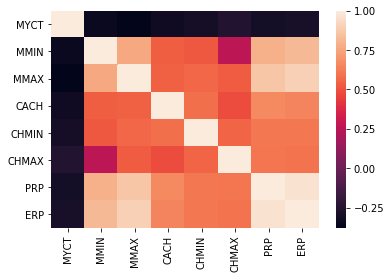

In [17]:
corr = df.corr()
sb.heatmap(corr)

In [18]:
def getPolynomial(data, degree=1):
    if degree ==1:
        return data
    poly = PolynomialFeatures(degree=degree)
    poly_features = poly.fit_transform(data)
    return poly_features

In [25]:
train_data = df.iloc[:, [3,4,8]].values
goal_data = df.iloc[:, -1].values

In [26]:
train_set, test_set, goal_train, goal_test = train_test_split(train_data, goal_data, test_size =0.2, random_state = 0)

In [27]:
model = LinearRegression()
model.fit(getPolynomial(train_set, 3), goal_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
goal_predict = model.predict(getPolynomial(test_set, 3))

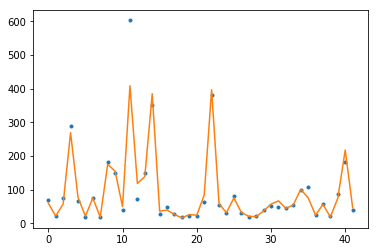

In [32]:
plt.plot(goal_test,'.', goal_predict, '-')
plt.show()

In [24]:
model.score(getPolynomial(train_set, 3), goal_train)

0.99236762675515366